# HW1, Dudin George 201

## Preparing env

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [27]:
df = pd.read_excel("dataset.xls") #pip install xlrd

## Task 1

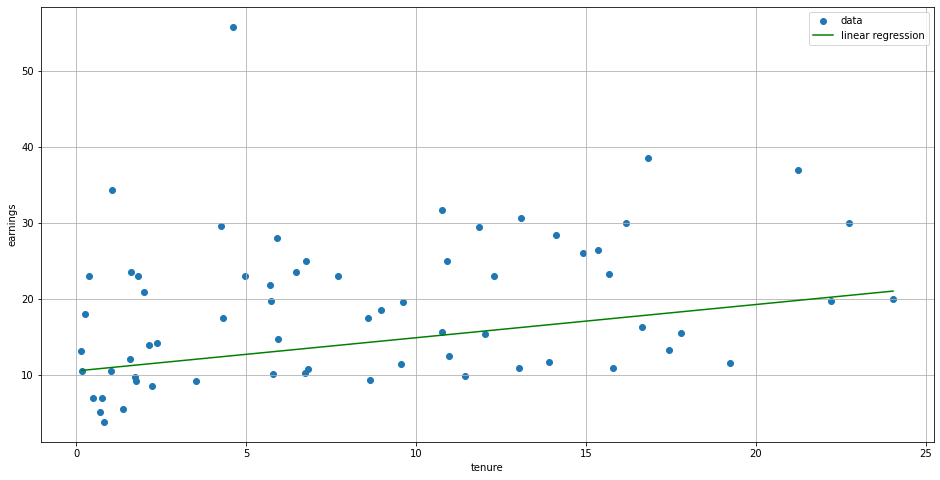

In [30]:
tenure, earnings = df['tenure'], df['earnings']

k = np.sum((tenure - np.mean(tenure)) * (earnings - np.mean(earnings))) \
    / np.sum((tenure - np.mean(tenure)) ** 2)
b = np.mean(earnings) - k * np.mean(earnings)

x_reg = np.linspace(min(tenure), max(tenure), 100)
y_reg = k * x_reg + b

plt.figure(figsize=(16, 8))
plt.grid()
plt.xlabel('tenure')
plt.ylabel('earnings')

plt.scatter(tenure, earnings, label='data')
plt.plot(x_reg, y_reg, color='g', label='linear regression')
plt.legend()
plt.show()